In [24]:
import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
import sys
# sys.path.append('../')
sys.path.append('../')
sys.path.append('../model')
sys.path.append('../cost')
sys.path.append('../constraints')
import Landing2DModel
import Landing2DCost
import Landing2DConstraints
from scipy.integrate import solve_ivp
from Scvx import Scvx

In [64]:
ix = 6
iu = 2
ih = 9
N = 100
delT = 0.1
max_iter = 10

In [74]:
xi = np.array([4,4,-2,0,-np.pi/3,0])
xf = np.array([0,0,0,0,0,0])


myModel = Landing2DModel.Landing2D('Hello',ix,iu,delT)
myCost = Landing2DCost.Landing2D('Hello',ix,iu,N)
myConst = Landing2DConstraints.Landing2D('Hello',ix,iu,ih)

x0 = np.zeros((N+1,ix))
for i in range(N+1) :
    x0[i] = (N-i)/N * xi + i/N * xf
# u0 = np.random.rand(N,iu)
u0 = np.zeros((N,iu))
# u0[:,0] = 0
u0[:,1] = 2

In [75]:
i1 = Scvx('unicycle',N,max_iter,myModel,myCost,myConst)
x, u = i1.update(x0,u0)

Boundary conditions are not satisified: just accept this step
non-positive expected reduction: should not occur
iteration   cost        ||vc||    ||tr||    reduction    expected    w_tr
0           0           0           0           -0.0196     -0.0196     0.0         
Boundary conditions are not satisified: just accept this step
1           0           4.21e-14    19.6        0.0187      0.0187      0.0         
Boundary conditions are not satisified: just accept this step
2           0           8.26e-14    0.969       0.000967    0.000967    0.0         
3           0           1.59e-12    0.00193     1.94e-06    1.94e-06    0.0         
SUCCEESS: virtual control and trust region < tol


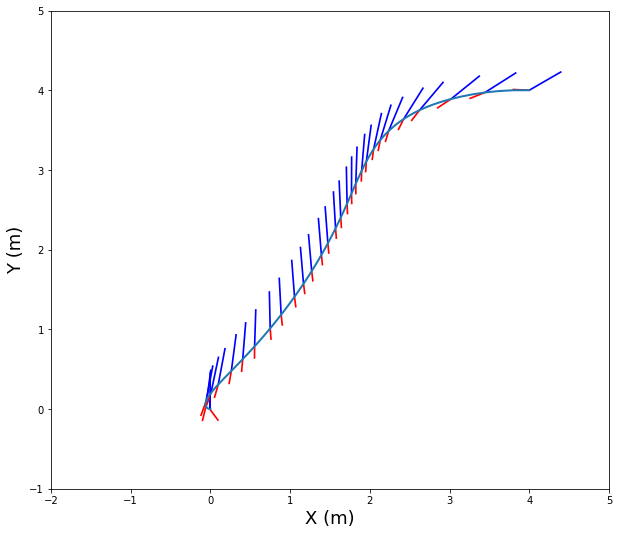

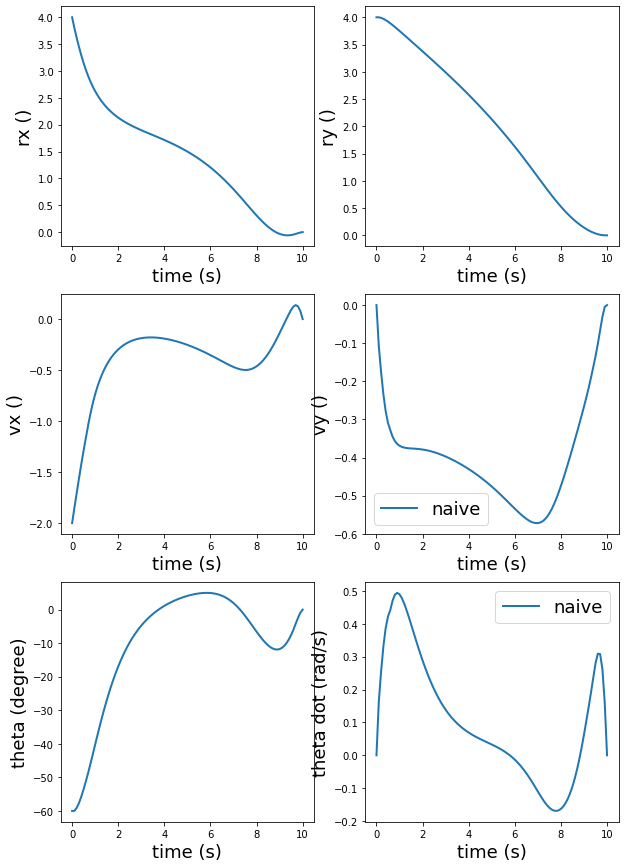

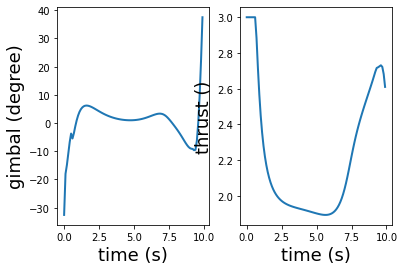

In [76]:
fS = 18
Fx = +np.sin(x[:N,4] + u[:,0]) * u[:,1]
Fy = -np.cos(x[:N,4] + u[:,0]) * u[:,1]
plt.figure(figsize=(10,10))
plt.plot(x[:,0], x[:,1], linewidth=2.0)
plt.gca().set_aspect('equal', adjustable='box')
index = np.linspace(0,N-1,30)
index = [int(i) for i in index]
plt.quiver(x[index,0], x[index,1], -np.sin(x[index,4]), np.cos(x[index,4]), color='blue', width=0.003, scale=15, headwidth=1, headlength=0)
plt.quiver(x[index,0], x[index,1], Fx[index], Fy[index], color='red', width=0.003, scale=100, headwidth=1, headlength=0)
plt.quiver(x[N,0], x[N,1], -np.sin(x[N,4]), np.cos(x[N,4]), color='blue', width=0.003, scale=15, headwidth=1, headlength=0)
plt.axis([-2, 5, -1, 5])
plt.xlabel('X (m)', fontsize = fS)
plt.ylabel('Y (m)', fontsize = fS)

plt.figure(figsize=(10,15))
plt.subplot(321)
plt.plot(np.array(range(N+1))*delT, x[:,0], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('rx ()', fontsize = fS)
plt.subplot(322)
plt.plot(np.array(range(N+1))*delT, x[:,1], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('ry ()', fontsize = fS)
plt.subplot(323)
plt.plot(np.array(range(N+1))*delT, x[:,2], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('vx ()', fontsize = fS)
plt.subplot(324)
plt.plot(np.array(range(N+1))*delT, x[:,3], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('vy ()', fontsize = fS)
plt.legend(fontsize=fS)
plt.subplot(325)
plt.plot(np.array(range(N+1))*delT, x[:,4]*180/np.pi, linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('theta (degree)', fontsize = fS)
plt.subplot(326)
plt.plot(np.array(range(N+1))*delT, x[:,5], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('theta dot (rad/s)', fontsize = fS)
plt.legend(fontsize=fS)
plt.show()

plt.figure()
plt.subplot(121)
plt.plot(np.array(range(N))*delT, u[:,0]*180/np.pi, linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('gimbal (degree)', fontsize = fS)
plt.subplot(122)
plt.plot(np.array(range(N))*delT, u[:,1], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('thrust ()', fontsize = fS)
plt.show()

In [13]:
import imageio
import os

In [14]:
Fx = +np.sin(x[:N,4] + u[:,0]) * u[:,1]
Fy = -np.cos(x[:N,4] + u[:,0]) * u[:,1]
filenames = []
for i in range(N+1) :
    fS = 18
    plt.figure(figsize=(10,10))
    plt.gca().set_aspect('equal', adjustable='box')
    index = i
    plt.plot(x[:i+1,0], x[:i+1,1], linewidth=2.0) 
    plt.plot(0, 0,'*', linewidth=2.0)
    plt.quiver(x[index,0], x[index,1], -np.sin(x[index,4]), np.cos(x[index,4]), color='blue', width=0.003, scale=15, headwidth=1, headlength=0)
    if i < N :
        plt.quiver(x[index,0], x[index,1], Fx[index], Fy[index], color='red', width=0.003, scale=100, headwidth=1, headlength=0)
    plt.axis([-2, 5, -1, 5])
    plt.xlabel('X (m)', fontsize = fS)
    plt.ylabel('Y (m)', fontsize = fS)
    filename = '../images/{:d}.png'.format(i)
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

In [15]:
with imageio.get_writer('../images/mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
for filename in set(filenames):
    os.remove(filename)